

---


<h3><center>MScFE 690 Capstone</center></h3>
<h3><center>Group 14</center></h3>
<h3><center>Predicting Indian Stock Market Index Movement using Macroeconomic Data and Machine Learning</center></h3>


---

<h3><center>Step 2: Modelling and Evaluation</center></h3>


Following Macroeconomic variables and Indexs are captured and analyzed for this paper are:

*   FII/DII Activity
*   GDP Growth rate
*   Crude Oil
*   Monetary Policy
*   USD/INR Exchange rates
*   US Global and Indian Market Index
*   Industrial Production
*   CPI

In this notebook, we will perform the Linear Regression and Decision Tree Regression.

In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Read the input file and set Date as the index
input_data_df = pd.read_csv("indexs_and_macroeconomic_data.csv")
input_data_df = input_data_df.set_index('Date')
input_data_df

,NSE Adj Close,Dow Jones Adj Close,Norm GDP,Brent Crude Price,CPI,IIP,Central Bank Rates,USD INR Rate,FII Net Purchase or Sales,DII Net Purchase or Sales
Date,,,,,,,,,,
1996-05-01,1137.80,5575.220215,100.928058,19.319130,27.196636,34.956089,12.00,34.80,NaN,NaN
1996-06-01,1089.90,5643.180176,100.835625,18.577500,27.611219,34.513567,12.00,35.23,NaN,NaN
1996-07-01,1109.00,5729.979980,100.743785,19.714783,28.108718,34.114211,12.00,35.10,NaN,NaN
1996-08-01,1036.60,5594.750000,100.653025,20.605909,28.440385,34.920563,12.00,35.65,NaN,NaN
1996-09-01,1029.00,5616.209961,100.563376,23.081429,28.523301,34.590072,12.00,35.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,17354.05,36338.300781,99.574644,85.622381,137.830179,119.009911,4.25,74.39,-35493.59,31231.05
2022-02-01,17576.85,35405.238281,99.517528,94.267000,137.720003,117.988724,4.25,74.78,-41346.35,21928.40
2022-03-01,16793.90,33294.949219,99.423298,112.440000,138.821763,119.245588,4.25,75.79,-45720.07,42084.07


## Normalization of Independent variables

In [16]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = list(input_data_df.columns)

# Don't normalize the NSE Adj Close Index values (y values)
numeric_vars.pop(0)

input_data_df[numeric_vars] = scaler.fit_transform(input_data_df[numeric_vars])

In [17]:
print("Scaled input data for all macroeconomic variables and independent variables is given below")
input_data_df

Scaled input data for all macroeconomic variables and independent variables is given below


,NSE Adj Close,Dow Jones Adj Close,Norm GDP,Brent Crude Price,CPI,IIP,Central Bank Rates,USD INR Rate,FII Net Purchase or Sales,DII Net Purchase or Sales
Date,,,,,,,,,,
1996-05-01,1137.80,0.000000,0.945585,0.074208,0.000000,0.011073,1.000000,0.000000,NaN,NaN
1996-06-01,1089.90,0.002209,0.940604,0.068199,0.003607,0.006157,1.000000,0.010317,NaN,NaN
1996-07-01,1109.00,0.005031,0.935654,0.077414,0.007936,0.001721,1.000000,0.007198,NaN,NaN
1996-08-01,1036.60,0.000635,0.930763,0.084634,0.010822,0.010678,1.000000,0.020393,NaN,NaN
1996-09-01,1029.00,0.001332,0.925932,0.104690,0.011543,0.007007,1.000000,0.025192,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,17354.05,1.000000,0.872651,0.611402,0.962613,0.944806,0.205128,0.949856,0.231238,0.765536
2022-02-01,17576.85,0.969669,0.869573,0.681441,0.961655,0.933462,0.205128,0.959213,0.186606,0.676014
2022-03-01,16793.90,0.901071,0.864495,0.828680,0.971241,0.947424,0.205128,0.983445,0.153253,0.869978


# Correlation Matrix

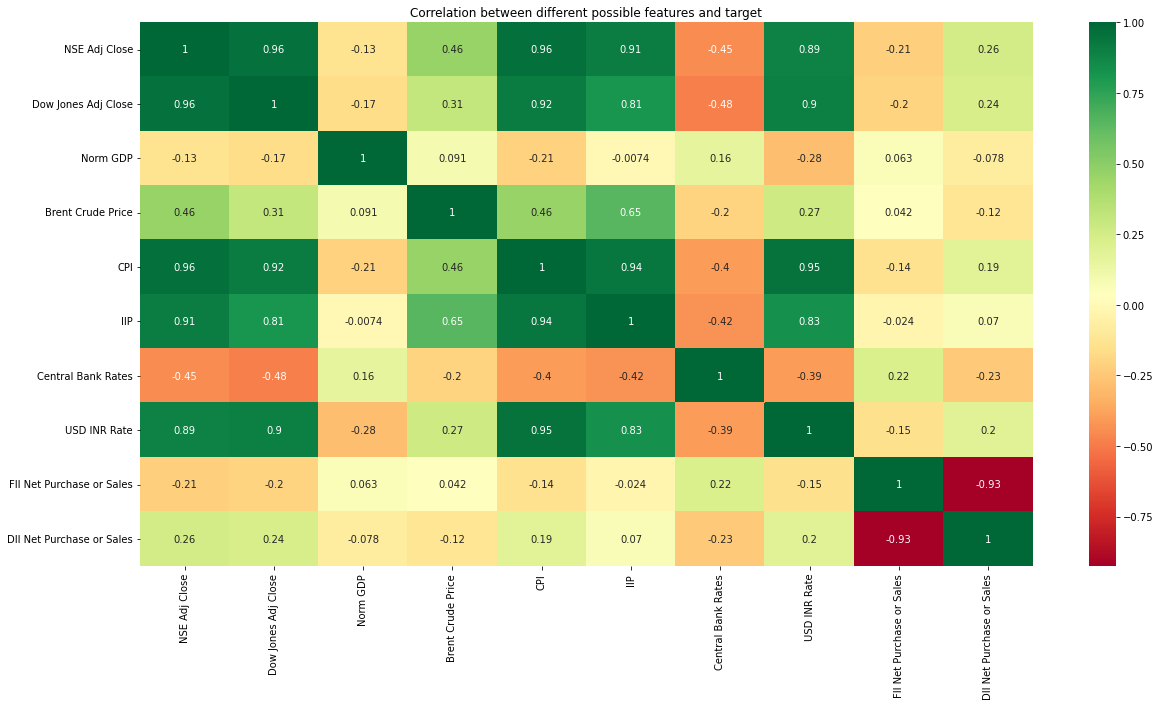

In [18]:
def feature_imp(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,10))

    # Plot heat map
    g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.title('Correlation between different possible features and target')
    plt.show()
    return 

feature_imp(input_data_df)

We can see the Nifty 50 Prices have high correlation with 

1.   US Dow Jones Index
2.   CPI
3.   IIP
4.   USD INR Exchange Rates
5.   Central Bank Interest Rates in India
6.   Brent Crude Prices


Nifty 50 is less correlated with


1.   Norm GDP
2.   FII Purchases or Sales
3.   DII Purchases or Sales


We can decide to remove the less correlated variables from our models after checking how the models behave with and without these variables.




---

## Linear Regression 


In [19]:
# Keep a backup of original data frame
backup_input_data_df = input_data_df.copy()

# Ignoring the lesser correlated values for the Linear Regression
input_data_df.drop(['Norm GDP', 'FII Net Purchase or Sales', 'DII Net Purchase or Sales'], axis=1, inplace=True)

# Spliting the data into Independent and Dependent Variables
X = input_data_df.iloc[:,1:]  # Independent Variables
y = input_data_df.iloc[:,:1]  # Dependent Variables

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    test_size = 0.3, 
                                                    random_state = 40)

# Applying linear regression
lreg = LinearRegression()

lreg.fit(X_train, y_train)
predicts = lreg.predict(X_test)
prediction = pd.DataFrame(predicts)
R_2 = r2_score(y_test, prediction)
    
adjusted_r_squared = 1 - (1-R_2)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)
mse = mean_squared_error(y_test['NSE Adj Close'], prediction, squared=False)
scatter_index = (mse/y_test['NSE Adj Close'].mean())

# Printing results  
print(f"R_Squared: {R_2}, Adjusted R_Squared: {adjusted_r_squared}, " \
      f"MSE: {mse}, Scatter Index: {scatter_index},\n\n Coefficients: {lreg.coef_},\n\n Features: {lreg.feature_names_in_}\n")

R_Squared: 0.9829645383840963, Adjusted R_Squared: 0.9817896789623098, MSE: 591.7016761933731, Scatter Index: 0.10071837419301573,

 Coefficients: [[10418.47735212  -444.01642859  9939.86337228  2128.45953094
     45.61419569 -6148.58734136]],

 Features: ['Dow Jones Adj Close' 'Brent Crude Price' 'CPI' 'IIP'
 'Central Bank Rates' 'USD INR Rate']



Perform 10-Fold Cross Validation

LinearRegression() 

R_Squared: 0.9829645383840963, Adjusted R_Squared: 0.9817896789623098, MSE: 591.7016761933731, Scatter Index: 0.10071837419301573, Mean CV Score: 0.9786546870933615




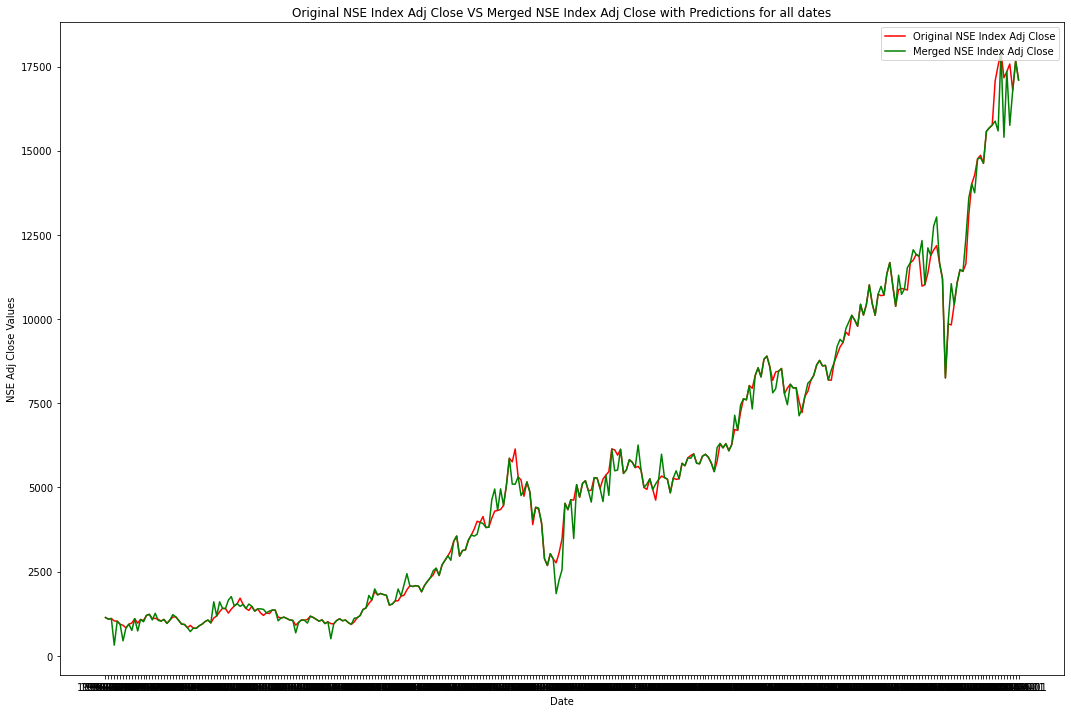

In [20]:
# Main function for models
def cross_val_model(algorithm, x_train_, y_train_, x_test_, y_test_, cv = 10): 
    algorithm.fit(x_train_,y_train_)
    predicts = algorithm.predict(x_test_)
    prediction = pd.DataFrame(predicts)
    R_2 = r2_score(y_test_,prediction)
    cross_val = cross_val_score(algorithm, x_train_, y_train_, cv = cv)
    
    adjusted_r_squared = 1 - (1-R_2)*(len(y_test_)-1)/(len(y_test_)-x_test_.shape[1]-1)
    mse = mean_squared_error(y_test_['NSE Adj Close'], prediction, squared=False)
    scatter_index = (mse/y_test_['NSE Adj Close'].mean())

    # Printing results  
    print(algorithm,"\n") 
    print(f"R_Squared: {R_2}, Adjusted R_Squared: {adjusted_r_squared}, " \
          f"MSE: {mse}, Scatter Index: {scatter_index}, Mean CV Score: {cross_val.mean()}\n\n")
    return prediction

# Plot for prediction vs originals
def plot_predictions(predictions, y_train, y_test_, display_entire_data = False):
  plt.figure(figsize=(18,12))
  predictions.index = y_test_.index
  plt.legend(loc='upper right')

  if display_entire_data:
      original_y_data = pd.concat([y_train, y_test_])
      original_y_data.sort_index(inplace=True)

      predictions.columns = ['NSE Adj Close']
      predicted_y_data_merged_with_original = pd.concat([y_train, predictions])
      predicted_y_data_merged_with_original.sort_index(inplace=True)

      plt.plot(original_y_data.index, original_y_data['NSE Adj Close'], 'r')
      plt.plot(predicted_y_data_merged_with_original.index, predicted_y_data_merged_with_original['NSE Adj Close'], 'g')
      plt.legend(["Original NSE Index Adj Close", "Merged NSE Index Adj Close"], loc='upper right')
      plt.title("Original NSE Index Adj Close VS Merged NSE Index Adj Close with Predictions for all dates")
      plt.xlabel("Date")
  else:
      plt.plot(y_test_.index, y_test_['NSE Adj Close'], 'r')
      plt.plot(predictions.index, predictions[0], 'g')
      plt.legend(["Original NSE Index Adj Close", "Predicted NSE Index Adj Close"], loc='upper right')
      plt.title("Original NSE Index Adj Close VS Predicted NSE Index Adj Close for test data")
      plt.xlabel("Dates from Test data")

  plt.ylabel("NSE Adj Close Values")
  plt.show()


lreg = LinearRegression()
predicted_y_set = cross_val_model(lreg, X_train, y_train, X_test, y_test)
plot_predictions(predicted_y_set, y_train, y_test, True)     

Summary:


*   The Accuracy of the model is defined by the R_Square statistic. The R_Square value is showing up a good score of 0.9829645383840963, demostrating a good fit on the data.
*   Moreover, Cross Validation Score also validates that the model will also perform better on unseen data.
*   When the less correlated variables were included, namely 'Norm GDP', 'FII Net Purchase or Sales' and 'DII Net Purchase or Sales', were removed, the model's R_Square and Mean Cross Validation score value slightly decreased to 0.9503238421077205 and 0.9582388415510887 respectively.




#Decision Tree Regressor

In [21]:
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# Calculate Adj_r_squared, MSE, Scatter Index

r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mse = mean_squared_error(y_test['NSE Adj Close'], y_pred, squared=False)

# Calculating the Scatter index and seeing how well the model performed
# https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square#:~:text=Based%20on%20a%20rule%20of,more%20is%20acceptable%20as%20well.
scatter_index = (mse/y_test['NSE Adj Close'].mean())

print(f"Trained_score: {model.score(X_train,y_train)}, \nTest score: {model.score(X_test,y_test)}, \n"
      f"R_Squared: {r_squared}, \nAdjusted R_Squared: {adjusted_r_squared}, \nMSE: {mse}, \nScatter Index: {scatter_index}\n\n")

if (scatter_index < .05):
  print(f"Model had scatter index of {scatter_index}, and has fit really well")
elif (scatter_index < .1):
  print(f"Model had scatter index of {scatter_index}, and has fit well")
else:
  print(f"Model had scatter index of {scatter_index}, and needs to be refined further")

Trained_score: 0.9965787330092293, 
Test score: 0.9862892798169924, 
R_Squared: 0.9862892798169924, 
Adjusted R_Squared: 0.9853437129078195, 
MSE: 530.8306368686397, 
Scatter Index: 0.09035701751127012


Model had scatter index of 0.09035701751127012, and has fit well


Model fitted really well with the test score of 0.9568604420448887 and Scatter Index of 0.9568604420448887. We could further try to tune the parameters to get the best score. We will use GridSearch or RandomizedSearch for hyper parameters tuning. 

#Training Decision Tree With Best Hyperparameters


In [23]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [4,5,6,7,8,9,10,11,12],
            "min_samples_leaf":[3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# calculating different regression metrics
tuning_model = GridSearchCV(model,
                            param_grid=parameters,
                            scoring='neg_mean_squared_error',
                            cv=3,
                            verbose=3)
tuning_model.fit(X,y)

# best hyperparameters 
print(f"Best Params: {tuning_model.best_params_}, \nBest Score: {tuning_model.best_score_}")

tuned_hyper_model = DecisionTreeRegressor(max_depth=tuning_model.best_params_['max_depth'],
                                         min_samples_leaf=tuning_model.best_params_['min_samples_leaf'],
                                         min_weight_fraction_leaf=tuning_model.best_params_['min_weight_fraction_leaf'],
                                         max_leaf_nodes=tuning_model.best_params_['max_leaf_nodes'],
                                         splitter=tuning_model.best_params_['splitter'])
                                         

Streaming output truncated to the last 5000 lines.
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=12, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random;, score=nan to

In [24]:
# fitting model
tuned_hyper_model.fit(X_train, y_train)

# prediction 
y_pred = tuned_hyper_model.predict(X_test)

# Calculate Adj_r_squared, MSE, Scatter Index

r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mse = mean_squared_error(y_test['NSE Adj Close'], y_pred, squared=False)

# Calculating the Scatter index and seeing how well the model performed
# https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square#:~:text=Based%20on%20a%20rule%20of,more%20is%20acceptable%20as%20well.
scatter_index = (mse/y_test['NSE Adj Close'].mean())

print(f"Trained_score: {model.score(X_train,y_train)}, \nTest score: {model.score(X_test,y_test)}, \n"
      f"R_Squared: {r_squared}, \nAdjusted R_Squared: {adjusted_r_squared}, \nMSE: {mse}, \nScatter Index: {scatter_index}\n\n")

if (scatter_index < .05):
  print(f"Model had scatter index of {scatter_index}, and has fit really well")
elif (scatter_index < .1):
  print(f"Model had scatter index of {scatter_index}, and has fit well")
else:
  print(f"Model had scatter index of {scatter_index}, and needs to be refined further")

Trained_score: 0.9965787330092293, 
Test score: 0.9862892798169924, 
R_Squared: 0.9869998545772583, 
Adjusted R_Squared: 0.9861032928239657, 
MSE: 516.8921678797367, 
Scatter Index: 0.08798443688190026


Model had scatter index of 0.08798443688190026, and has fit well


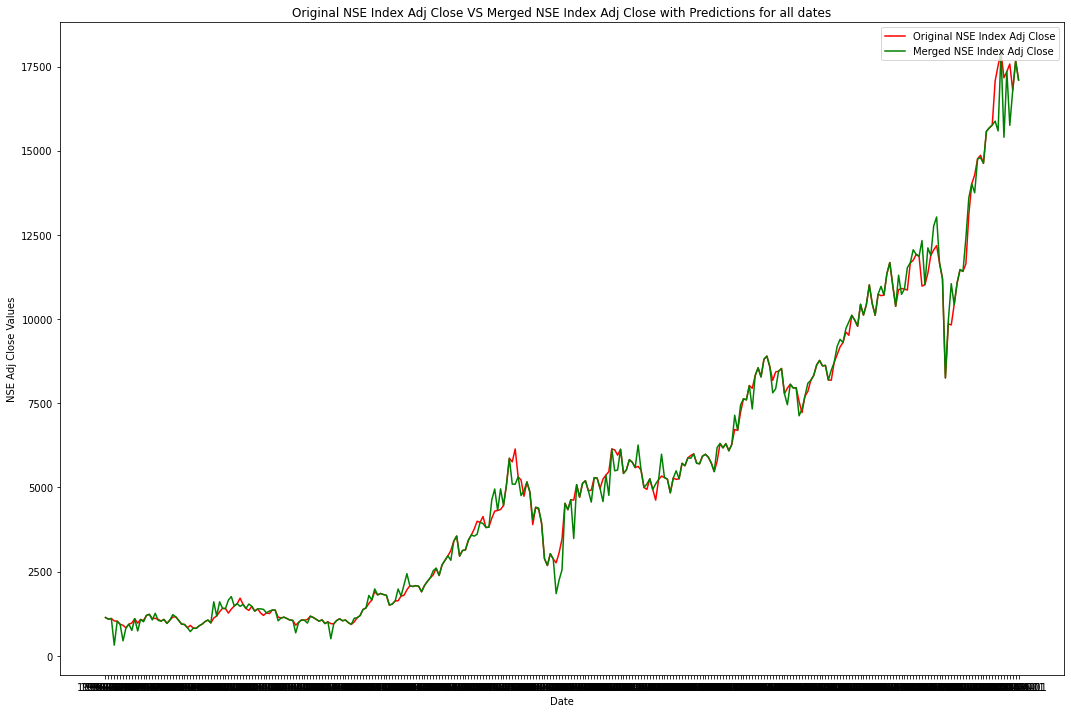

In [25]:
prediction = pd.DataFrame(predicts)
plot_predictions(prediction, y_train, y_test, True)     

# Plot the decision tree

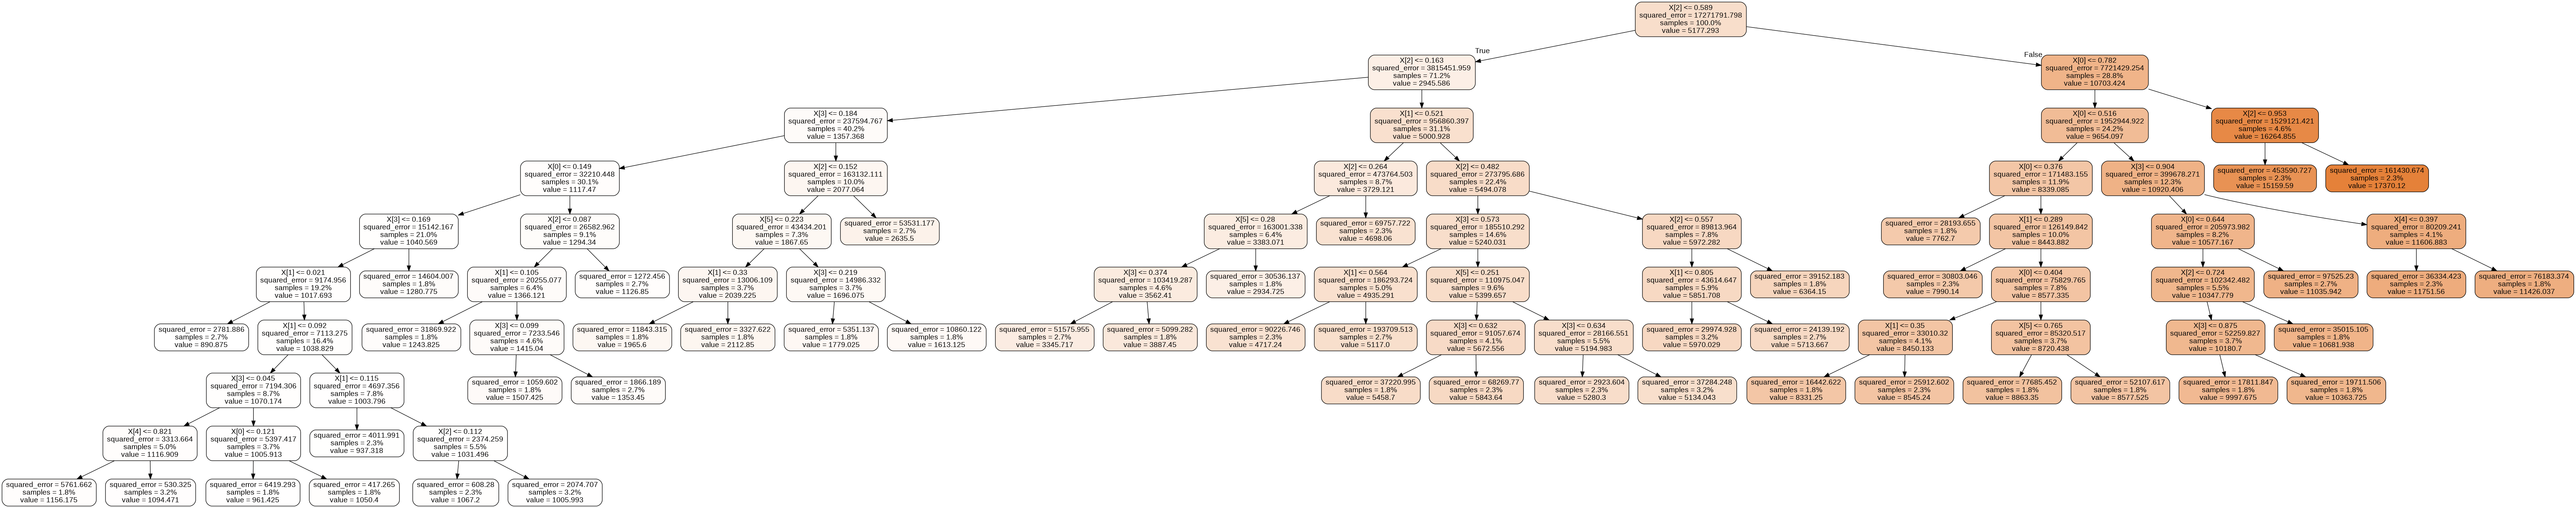

In [26]:
dot_data = export_graphviz(tuned_hyper_model, out_file=None,  filled=True, rounded=True, proportion=True)
graph = graphviz.Source(dot_data, filename='DecisionTreeRegressor_img', format='png')
graph.render();
Image('DecisionTreeRegressor_img.png')



---

